# Model Project: Ricardian Model of International Trade

General outline for us:

Ricardian Model
- assumptions ...
- definitions/ equations ...
- analytical solution: solve for relative prices; solving autarky, vs. trade price ratios
- numeric solution ...
- extension of the model: scale effects, transportation costs are probably easiest to implement

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import RicardianModelClass

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

# Ricardian Model - General Assumptions

The Ricardian Model of International Trade is a theory that explains how gains from trade develop. The basic version assumes two countries that produce two goods. Labor is the only necessary input for production. The model describes a perfect equilibrium with perfect competition on all markets. There are no transportation costs for trade between countries. The goods that countries produce are assumed to be identical for each industry. Labor is homogeneous in a given country, but labor productivity can vary between countries. Additionally, labor is assumed to be mobile across industries in a country, but not across countries. Households (that consist of workers supplying labor to the economy) maximize utility subject to a budget constraint that depends on income. 

Our setup:

Suppose there are two countries, Denmark (denoted without a *) and Germany (denoted with a *). Both countries produce two goods each, beer (y1) and pharmaceuticals (y2). Labor is the only necessary input for production. The linear production technologies are given by:

$$
y_1 = a_1 L_1;          y_2 = a_2 L_2
$$

$L_i$ denotes labor employed, $a_i$ the respective productivity in sector $i = 1,2$. The given industries use the total available labor $L$ in each country:

$$
L_1 + L_2 = L
$$

Workers are assumed to be perfectly mobile between industries, but not across countries. There are no transportation costs for trade between countries. The goods that countries produce are assumed to be identical for each industry. While labor is assumed to be homogeneous, labor productivity can vary between countries. Thus, the following inequality determines differences in productivity:

$$
\frac{a_1}{a_2} > \frac{a^*_1}{a^*_2}
$$

Each country is inhabited by a representative consumer with the following Cobb-Douglas utility function:

$$
U(c_1, c_2) = c_1^{\alpha}  c_2^{1-\alpha}
$$

where $c_1$ and $c_2$ denote consumption of the respective goods. Consumers financially constrained by the income $I$ they earn. This income is determined by their wage $w$ and the amount of labor they provide. The model assumes income to be fully used for the consumption of goods:

$$
I = wL = py_1 + y_2
$$

The price of $y_2$ is normalized to 1.




Graphical Analysis: PPS

In a Ricardian Model, countries differ in productivity ($a_1$ and $a_2$ in our setup) of their respective industries. This can be shown by Production Possibility Sets (PPS) that contain all possible combinations of labor endowments, that leave no labor unused. Suppose Denmark is better at producing pharmaceuticals than Germany, while Germany is better at producing beer. The individual productivites could be:

$$
a_1 = 4, a_2 = 8, a^*_1 = 10, a^*_2 = 3
$$

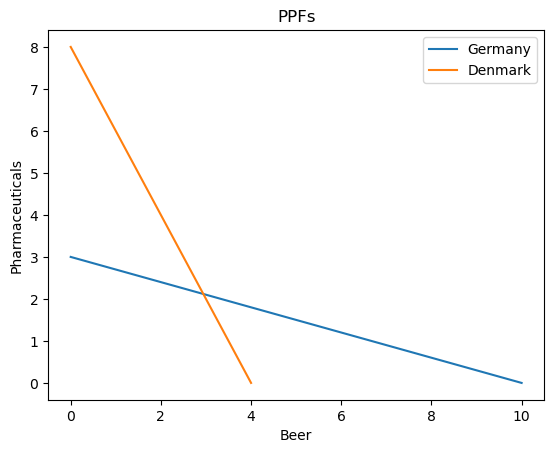

In [3]:
# Production Possibility Sets (?) for Denmark and Germany

model = RicardianModelClass()

model.a1_d = 4   #Danish productivity for Beer
model.a2_d = 8   #Danish productivity for Pharmaceuticals
model.a1_g = 10  #German productivity for Beer
model.a2_g = 3   #German productivity for Pharmaceuticals

model.ppf_plot(model.a1_d, model.a2_d, model.a1_g, model.a2_g)




## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

The Ricardian Model of International Trade is a general equilibrium model. This allows for analytical solutions of various equilibrium variables, such as price, wages, and quantities consumed. 

In [211]:
# Deriving the equilibrium price
# The equilibrium price is assumed to maximize household utility

c1 = sm.symbols('c1')
c2 = sm.symbols('c2')
alpha = sm.symbols('alpha')
p = sm.symbols('p')
I = sm.symbols('I')
a1 = sm.symbols('a1')
a2 = sm.symbols('a2')
L = sm.symbols('L')
a_2 = sm.symbols('a2s')
L_ = sm.symbols('Ls')
mu = sm.symbols('mu')

In [212]:
objective = c1**(alpha) * c2**(1-alpha)
objective

c1**alpha*c2**(1 - alpha)

In [213]:
budget_constraint = sm.Eq(p*c1 + c2, I)
budget_constraint
#Isolate
c2_from_con = sm.solve(budget_constraint, c2)
c2_from_con[0]


#Substitute


objective_subs_c1 = objective.subs(c2, c2_from_con[0])
objective_subs_c1


# FOC


foc_c1 = sm.diff(objective_subs_c1, c1)
foc_c1


# Solve


sol_c1 = sm.solve(sm.Eq(foc_c1,0), c1)
sol_c1[0]

I*alpha/p

In [214]:
#Isolate
c1_from_con = sm.solve(budget_constraint, c1)
c1_from_con[0]


#Substitute


objective_subs_c2 = objective.subs(c1, c1_from_con[0])
objective_subs_c2


# FOC


foc_c2 = sm.diff(objective_subs_c2, c2)
foc_c2




sol_c2 = sm.solve(sm.Eq(foc_c2,0), c2)
sol_c2[0]

I*(1 - alpha)

In [215]:
# Bringing both c1 and c2 together to solve for p


opt_c1 = sm.Eq(c1, sol_c1[0])
opt_c1 = sm.solve(opt_c1, I)


opt_c2 = sm.Eq(c2, sol_c2[0])
opt_c2 = sm.solve(opt_c2, I)


# solve for p


x = sm.Eq(opt_c1[0], opt_c2[0])


sol_p = sm.solve(x, p)
sol_p[0]

-alpha*c2/(c1*(alpha - 1))

In [216]:
marshall_c2 = sm.solve(x, c2)


# Insert into the budget constraint

budget_constraint_marsh_c1 = sm.Eq(p*c1 + marshall_c2[0], I)

# solve for c1

c1_marsh = sm.solve(budget_constraint_marsh_c1, c1)
c1_marsh[0]


I*alpha/p

In [217]:
marshall_c1 = sm.solve(x, c1)

# Insert into the budget constraint

budget_constraint_marsh_c2 = sm.Eq(p * marshall_c1[0] + c2, I)

# solve for c1

c2_marsh = sm.solve(budget_constraint_marsh_c2, c2)
c2_marsh[0]


I*(1 - alpha)

In [218]:
# world demand for good 1 

world_sup = sm.Eq(((p + a1 * L) * alpha)/p + (a_2 * L_) * alpha/p, a1 * L)

# solve for the world price

world_p = sm.solve(world_sup, p)
world_p[0]

alpha*(L*a1 + Ls*a2s)/(L*a1 - alpha)

In [220]:
# lampdify 
world_p_func = sm.lambdify(args=(alpha, L, L_, a1, a_2), expr = world_p[0])

alpha_vec = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
L_val = 1
L__val = 1
a1_val = 10
a_2_val = 8


price_world = world_p_func(alpha_vec, L_val, L__val, a1_val, a_2_val)
for x in price_world:
    print(f'pw: {x:1.3f}')

pw: 0.000
pw: 0.367
pw: 0.750
pw: 1.149
pw: 1.565
pw: 2.000


When we perform the analytical solution we come to an equilibrium price of 
$$
p^w = \frac{\alpha(La_1 + L^* a_2^*)}{La_1 - \alpha}
$$
which is what we expected.

In [204]:
# Prices in Autarky 
a1_g = 10 
a2_g = 3
autarky_price_g = sm.Eq(p**(a), a2_g/a1_g)

autarky_price_g


Eq(p**a, 0.3)

In [205]:
a1_dk = 4 
a2_dk = 8

autarky_price_dk = sm.Eq(p**(a), a2_dk/a1_dk)


autarky_price_dk

Eq(p**a, 2.0)

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

The Ricardian Model is best used to show gains of trade. To illustrate this, we will solve our model under two conditions. Firstly, we assume autarky such that both countries have to produce both goods and cannot trade. Then, we assume that both countries are allowed to trade. Finally, we compare the amounts produced. Under the assumptions of the model, higher amounts of production lead to higher amounts of consumption. Thus, increased production increases the utility and therefore the welfare of the population of both countries.

# Autarky

Under autarky, Denmark and Germany cannot trade. Thus, we calculate the optimal consumption bundles for each country individually.

Optimal value of c1 in Germany: 5.000
Optimal value of c2 in Germany: 1.500


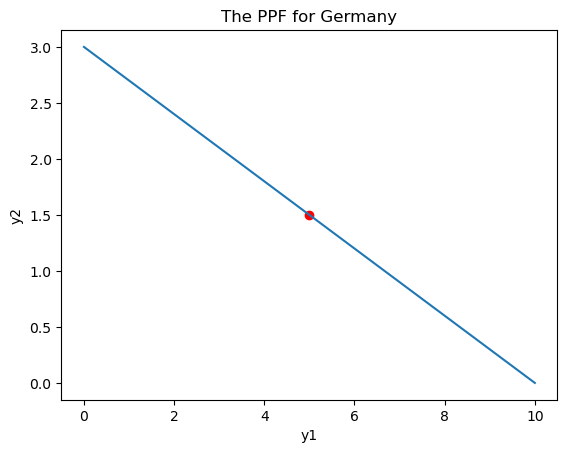

In [221]:
# Germany under autarky

model = RicardianModelClass()

# insert values
alpha = 0.5
a1 = 10
a2 = 3

optimal_c1, optimal_c2 = model.optimize_autarky(alpha, a1, a2)

# Print the optimal values of c1 and c2
print(f"Optimal value of c1 in Germany: {optimal_c1:.3f}")
print(f"Optimal value of c2 in Germany: {optimal_c2:.3f}")

# Visualize the optimal consumption in the PPF


# define a range of values for y1
y1 = np.linspace(0, 10)


# calculate corresponding values of y2 using the given equation
y2 = a2 - (a2/a1)*y1


# plot y2 against y1
plt.plot(y1, y2)
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('The PPF for Germany')


# add a point at coordinates (5, 2)
plt.scatter(optimal_c1, optimal_c2, color='red')


plt.show()


Optimal value of c1 in Denmark: 2.001
Optimal value of c2 in Denmark: 3.999


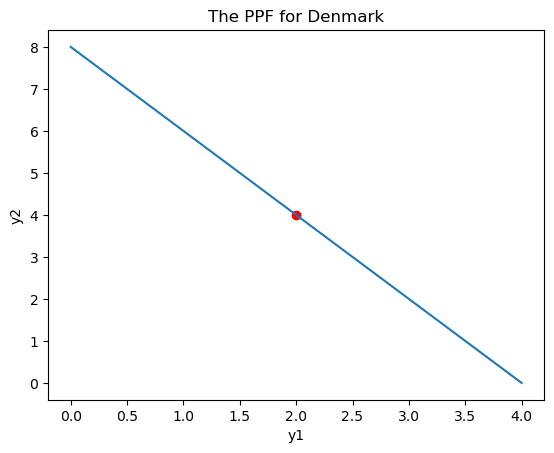

In [222]:
# Denmark under autarky

model = RicardianModelClass()

# insert values
alpha = 0.5
a1 = 4
a2 = 8

optimal_c1, optimal_c2 = model.optimize_autarky(alpha, a1, a2)

# Print the optimal values of c1 and c2
print(f"Optimal value of c1 in Denmark: {optimal_c1:.3f}")
print(f"Optimal value of c2 in Denmark: {optimal_c2:.3f}")

# Visualize the optimal consumption in the PPF


# define a range of values for y1
y1 = np.linspace(0, 4)


# calculate corresponding values of y2 using the given equation
y2 = a2 - (a2/a1)*y1


# plot y2 against y1
plt.plot(y1, y2)
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('The PPF for Denmark')


# add a point at coordinates (5, 2)
plt.scatter(optimal_c1, optimal_c2, color='red')


plt.show()


# Trade

As we have shown with the world price and the two autarky prices for both countries, Germany is supposed to produce beer and Denmark is producing pharamaceuticals.

In [ ]:
# First possibility of trade


a1G = 3
a2G = 1
a1DK = 1
a2DK = 3


def u1(c1G, c2G):
   return c1G**(0.5)*c2G**(0.5)


def u2(c1DK, c2DK):
   return c1DK**(0.5)*c2DK**(0.5)


def y1G(a1G, a2G, a1DK, a2DK):
   return a1G if (a1G/a2G) > (a1DK/a2DK) else 0


def y2G(a1G, a2G, a1DK, a2DK):
   return a2G if (a1G/a2G) < (a1DK/a2DK) else 0


def y1DK(a1G, a2G, a1DK, a2DK):
   return a1DK if (a1G/a2G) < (a1DK/a2DK) else 0


def y2DK(a1G, a2G, a1DK, a2DK):
   return a2DK if (a1G/a2G) > (a1DK/a2DK) else 0


def constraint1(x):
   c1G, c1DK = x[0], x[2]
   return y1G(a1G, a2G, a1DK, a2DK) - c1G - c1DK


def constraint2(x):
   c2G, c2DK = x[1], x[3]
   return y2G(a1G, a2G, a1DK, a2DK) - c2G - c2DK


def constraint3(x):
   c1G, c1DK  = x[0], x[2]
   return y1DK(a1G, a2G, a1DK, a2DK) - c1G - c1DK


def constraint4(x):
   c2G, c2DK = x[1], x[3]
   return y2DK(a1G, a2G, a1DK, a2DK) - c2G - c2DK


cons = [{'type':'ineq', 'fun':constraint1},
       {'type':'ineq', 'fun':constraint2},
       {'type':'ineq', 'fun':constraint3},
       {'type':'ineq', 'fun':constraint4}]


x0 = [3, 6, 1, 2]


res = minimize(lambda x: -u1(x[0], x[1]) - u2(x[2], x[3]), x0, constraints=cons)


print(res)


In [181]:
from scipy.optimize import minimize


# Production function
def production_function(a, L):
    return a * L


# Utility function
def utility_func(c1, c2, alpha):
    return c1 ** alpha * c2 ** (1 - alpha)


# Utility function with alpha parameter
def utility(x, alpha):
    c1, c2 = x
    return c1 ** alpha * c2 ** (1 - alpha)


# PPF constraint function
def constraint_ppf(x, a1, a2):
    c1, c2 = x
    return a1 - c1 + (a2 / a1) * c2


# Constants for autarky
a1_autarky = 100
a2_autarky = 100
p_autarky = 1

# Constants for trade
a1_Germany = 100
a2_Germany = 100
a1_Denmark = 100
a2_Denmark = 100
p_Germany = 1
p_Denmark = 1

# Initial guess for consumption quantities
x0_trade = [50, 50, 50, 50]

# Constraints for trade
cons_trade = [{'type': 'ineq', 'fun': lambda x: production_function(a1_Germany, x[0]) - x[1]},
              {'type': 'ineq', 'fun': lambda x: production_function(a1_Denmark, x[2]) - x[3]},
              {'type': 'ineq', 'fun': lambda x: p_Germany * x[0] + p_Denmark * x[2] - (p_Germany * x[1] + p_Denmark * x[3])},
              {'type': 'eq', 'fun': lambda x: constraint_ppf([x[0], x[1]], a1_Germany, a2_Germany)},
              {'type': 'eq', 'fun': lambda x: constraint_ppf([x[2], x[3]], a1_Denmark, a2_Denmark)}]

# Optimization for consumption quantities under trade
res_trade = minimize(lambda x: -utility(x[:2], 0.5) - utility(x[2:], 0.5), x0_trade, constraints=cons_trade, method='SLSQP')

# Calculate utility under trade
utility_trade = -res_trade.fun

# Calculate utility under autarky
x_autarky = [production_function(a1_autarky, a1_autarky/2), a1_autarky/2]
utility_autarky = utility(x_autarky, 0.5)

# Compare utility under trade and autarky
if utility_trade > utility_autarky:
    print("Trade provides")

print("Utility under autarky:", utility_autarky)
print("Utility under trade:", utility_trade)
print("Consumption quantities under trade for Germany:", res_trade.x[:2])
print("Consumption quantities under trade for Denmark:", res_trade.x[2:])





Trade provides
Utility under autarky: 500.00000000000006
Utility under trade: 822949122005236.2
Consumption quantities under trade for Germany: [4.11474559e+14 4.11474559e+14]
Consumption quantities under trade for Denmark: [4.11474563e+14 4.11474563e+14]


Since the autarky price in Denmark is much higher than in Germany, the aggregate consumption is much lower.

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 